# Simulation LAB
---
Shir Tavor , 21.9.20


# Table of Content

<a href="#Driving-&-Parking--Exercise-1">Exercise 1</a>

<a href="#Priority-Resource">Priority Resource</a>

<a href="#Gas-Station-Refueling-example--Exercise-2">Exercise 2</a>

<a href="#Miley-and-Peter--Exercise-3">Exercise 3</a>

<a href="#Movie-Theater">Movie Theater</a>

Note: This cell has to be ran in order to run any of the questions.

In [1]:
import numpy as np
import heapq
from pylab import plot, show, bar
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import random

np.random.seed(0)

# Movie Theater

A movie theater has one ticket counter selling tickets for three movies (next show only). 

When a movie is sold out, all people waiting to buy tickets for that movie renege (leave queue).

In [23]:
class Event():
    def __init__(self, time, eventType, customer = -1, movie1 = -1):
        self.time = time # event time
        self.eventType = eventType # type of the event
        self.customer = customer
        self.movie1 = movie1
        heapq.heappush(P, self) #add the event to the events list

    def __lt__(self,event2):
        return self.time < event2.time

class Customer(object):
    def __init__(self, theater , arrival_time,i):
        self.theater = theater
        self.patience = np.random.uniform(1,5)
        self.movie = random.choice(theater.movies)
        self.num_tickets = random.randint(1, 6)
        self.arrival_time = arrival_time
        self.id = i
        self.left = False
    
class Theater(object):
    """A Theater has a name, one seller(Resource),movies list and for each movie:
    1. number of available tickets
    2. sold out event (might happen)
    3. when_sold_out (if Event.processed==True)
    4. num_leavers

    """
    def __init__(self,name,movies,TICKETS):
        self.name = name
        self.counter = 1
        self.movies = movies
        self.available = {movie: TICKETS for movie in movies}
        self.when_sold_out = {movie: None for movie in movies}
        self.num_leavers = {movie: 0 for movie in movies}       #number of leavers for each movie 
        self.L = 0                                               #number of customers in the system   
        self.all_sold_out = False

# Setup and start the simulation
print('Movie Theater')
curr_time = 0   
P = []
A = 0
SIM_TIME = 120  
time = []                               #list for visualization
people_in = []                          #list for visualization
line = []

TICKETS = 50     # Number of tickets per movie
movies = ['Harry Potter', 'Aviva, my love', 'The Great Dictator']

# Create movie theater (the _Init_ function)
theater = Theater('Theater', movies, TICKETS)

i=0

x = np.random.exponential(1 / 2) # time for the first event
Event(x ,"arriving")
    
while curr_time < SIM_TIME or not theater.all_sold_out :

    event = heapq.heappop(P)
    curr_time = event.time
    
    if event.eventType == "arriving" : 
        new_customer = Customer(theater, curr_time,i)
        movie = new_customer.movie
        num_tickets = new_customer.num_tickets
        if theater.available[movie] > 0 :
            i+=1
            theater.L+=1
            people_in.append(theater.L)
            time.append(curr_time)  
            if A==0:
                A = 1
                Event(curr_time +  1 ,"buy_tickets", new_customer) 
            else:
                heapq.heappush(line, (new_customer.arrival_time, new_customer))
            Event(curr_time + new_customer.patience ,"out_of_patience", new_customer) 
        Event(curr_time + np.random.exponential(1 / 2) ,"arriving") # create the next arrivel   
        

    elif event.eventType == "buy_tickets" : 
        if event.customer.left == False: #check if the customer left the queue
            movie = event.customer.movie
            # Check if enough tickets left.
            if theater.available[movie] < event.customer.num_tickets:
                # customer leaves after some discussion
                Event(curr_time + 0.5 ,"argue_with_seller", event.customer)
            else:      # Buy tickets
                theater.available[movie] -= num_tickets
                if theater.available[movie] < 1:
                    # Trigger the "sold out" event for the movie
                    Event(curr_time ,"sold_out", movie1 = movie )
            theater.L -=1
            people_in.append(theater.L)
            time.append(curr_time)
            event.customer.left = True
        if line:
            arrival_time, customer = heapq.heappop(line)
            Event(curr_time +  1 ,"buy_tickets", customer)
        else:
            A = 0
            
    elif event.eventType == "argue_with_seller" : 
        if line:
            arrival_time, customer = heapq.heappop(line)
            Event(curr_time +  1 ,"buy_tickets", customer)
        else:
            A = 0
            
    elif event.eventType == "sold_out" : 
        theater.when_sold_out[movie] = curr_time
        theater.available[movie] = 0
        line = [item for item in line if item[1].movie != event.movie]
        if not any([movie==None for movie in theater.when_sold_out.values()]):
            theater.all_sold_out = True
        
    elif event.eventType == "out_of_patience" : 
        if event.customer.left != True:
            event.customer.left = True
            theater.num_leavers[movie] += 1
            theater.L -=1
            people_in.append(theater.L)
            time.append(curr_time)
        
# Analysis/results
for movie in theater.movies:
    print('Movie "%s" sold out %.1f minutes after ticket counter '
          'opening.' % (movie, theater.when_sold_out[movie]))
    print('  Number of people leaving queue: %s' %
          theater.num_leavers[movie])

Movie Theater
Movie "Harry Potter" sold out 29.3 minutes after ticket counter opening.
  Number of people leaving queue: 3
Movie "Aviva, my love" sold out 46.2 minutes after ticket counter opening.
  Number of people leaving queue: 3
Movie "The Great Dictator" sold out 50.1 minutes after ticket counter opening.
  Number of people leaving queue: 8


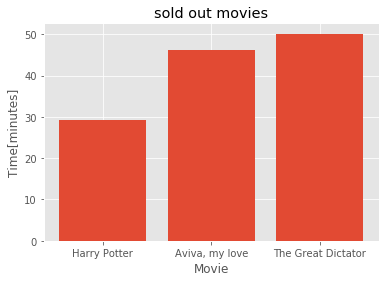

In [24]:
dictionary = plt.figure()
D = {u'Harry Potter': theater.when_sold_out['Harry Potter'], u'Aviva, my love': theater.when_sold_out['Aviva, my love'],u'The Great Dictator': theater.when_sold_out['The Great Dictator']}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.xlabel('Movie')
plt.ylabel('Time[minutes]')
plt.title('sold out movies')
plt.show()

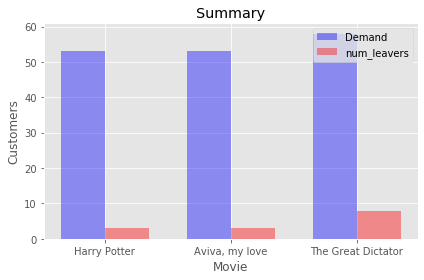

In [25]:
n_groups = 3

Got_in = (theater.num_leavers['Harry Potter']+50,theater.num_leavers['Aviva, my love']+50,theater.num_leavers['The Great Dictator']+50)

soldout_leaving = (theater.num_leavers['Harry Potter'],theater.num_leavers['Aviva, my love'],theater.num_leavers['The Great Dictator'])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, Got_in, bar_width,
                alpha=opacity, color='b',
                label='Demand')

rects2 = ax.bar(index + bar_width, soldout_leaving, bar_width,
                alpha=opacity, color='r',
                label='num_leavers')

ax.set_xlabel('Movie')
ax.set_ylabel('Customers')
ax.set_title('Summary')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(movies)
ax.legend()

fig.tight_layout()
plt.show()

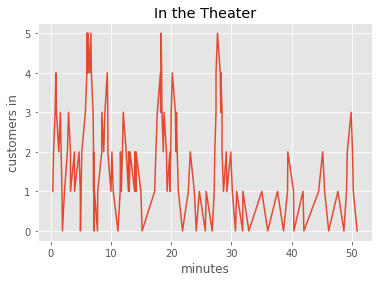

In [26]:
plt.plot(time,people_in)
plt.title('In the Theater')
plt.ylabel('customers in')
plt.xlabel('minutes')
plt.show()